In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('..')

In [59]:
from pathlib import Path
from torchvision.io import read_image
import matplotlib.pyplot as plt
import torch
import pandas as pd
import numpy as np
import random
from torchvision.io import read_image

In [4]:
DATA_DIR = Path('data')
DATASET_DIR = DATA_DIR / 'downloaded' / 'mirflickr_25k' / 'mirflickr'
EXIF_DIR = DATASET_DIR / 'meta' / 'exif_raw'

In [5]:
img_paths = list(DATASET_DIR.glob('*.jpg'))
exif_paths = list(EXIF_DIR.glob('*.txt'))

Analyze Images

In [15]:
img = read_image(str(img_paths[0]))

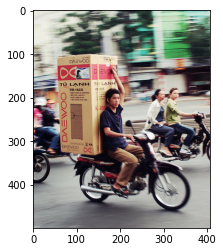

In [18]:
plt.imshow(img.permute(1, 2, 0).numpy())

In [23]:
img_shapes = torch.zeros(len(img_paths), 2)

for i, p in enumerate(img_paths):
    img = read_image(str(p))
    C, H, W = img.shape

    img_shapes[i, 0] = H
    img_shapes[i, 1] = W


In [27]:
img_heights = img_shapes[:, 0]
img_heights.min(), img_heights.max(), img_heights.mean()

(tensor(42.), tensor(500.), tensor(398.5206))

In [29]:
img_widths = img_shapes[:, 1]
img_widths.min(), img_widths.max(), img_widths.mean()

(tensor(118.), tensor(500.), tensor(462.1389))

Compile the EXIF data into a dataframe

How many unique EXIF attributes are there?

In [7]:
sorted(exif_paths)[0]

PosixPath('data/downloaded/mirflickr_25k/mirflickr/meta/exif_raw/exif1.txt')

In [6]:
data_dicts = []

for p in exif_paths:
    d = {}

    idx = int(p.stem[4:])
    d['img_path'] = str(DATASET_DIR / f'im{idx}.jpg')

    with p.open('r', errors='replace') as f:
        lines = f.readlines()

    for i in range(int(len(lines) / 2)):
        attr = lines[i * 2][1:].strip()
        value = lines[(i * 2) + 1].strip()

        d[attr] = value

    data_dicts.append(d)

In [46]:
df = pd.DataFrame(data_dicts)
img_paths = df['img_path']

In [47]:
exif_attrs = list(
            df.drop("img_path", axis=1)
            .isnull()
            .mean(0)
            .sort_values()[: 80]
            .index
        )
exif_data = df[exif_attrs]

In [40]:
exif_col = exif_data.iloc[:, 0]
exif_value = np.random.choice(exif_col.unique())

In [48]:
is_exif_val = exif_col == exif_value

In [56]:
batch_size = 32
n_exif_attr = 80

labels_a = np.empty((batch_size, n_exif_attr), dtype=object)
labels_b = np.empty((batch_size, n_exif_attr), dtype=object)

In [64]:
for i in range(int(batch_size / 2)):
    img_a_idx = random.randint(0, len(img_paths))
    img_a = read_image(img_paths[img_a_idx])
    

    break

In [69]:
img.shape

torch.Size([3, 500, 333])

In [79]:
# How are these EXIF attributes selected?
exif_attrs = [
    'Brightness',
    'Color Space',
    # 'Components Configuration',
    'Compressed Bits per Pixel',
    'Contrast',
    'Custom Rendered',
    'Date and Time (Digitized)',
    'Date and Time (Original)',
    'Digital Zoom Ratio',
    'Image Length',
    'Image Width',
    'Version',
    'Exposure Bias',
    'Exposure Mode',
    'Exposure Program',
    # 'Exposure Time'
    'Source',
    'Flash',
    # 'Flash Pix Version',
    # 'F Number',
    'Focal Length',
    'Focal Length In 35mm Film',
    'Focal Plane Resolution Unit',
    'Focal Plane X Resolution',
    'Focal Plane Y Resolution',
    'Gain Control',
    # 'Interoperability Offset'
    'ISO Speed',
    # 'Lens Make',
    # 'Lens Model',
    'Lens Specification',
    'Light Source',
    'Maximum Lens Aperture',
    'Metering Mode',
    # 'Offset Schema',
    'Saturation',
    'Scene Capture Type',
    'Scene Mode',
    'Sensing Method',
    # 'Sensitivity Type',
    'Sharpness',
    'Shutter Speed',
    'Subject Area',
    'Subject Distance Range',
    'Sub-Second Time',
    'Sub-Second Time (Digitized)',
    'Sub-Second Time (Original)',
    'User Comment',
    'White Balance',
    'Altitude',
    'Altitude Reference',
    'GPS Date',
    'Direction of Image',
    'Reference for Direction of Image',
    'Latitude',
    'North or South Latitude',
    'Longitude',
    'East or West Longitude',
    'GPS Time (atomic clock)',
    # 'GPS Version ID',

]

0.9376

In [16]:
sorted(list(df.columns))

['ACD Comment',
 'AE Bracket Compensation Applied',
 'Action Advised',
 'Altitude',
 'Altitude Reference',
 'Aperture',
 'Artist Name',
 'Author',
 'Auto Exposure Warning',
 'Auto Flash Mode',
 'Auxiliary Lens (Adapter)',
 'Bestshot Mode',
 'Bits per Sample',
 'Black Level',
 'Black and White Mode',
 'Blue Bias',
 'Blur Warning',
 'Bracket',
 'Bracketing &amp; Shooting Mode',
 'Brightness',
 'By-Line (Author)',
 'By-Line Title (Author Position)',
 'CCD ISO Sensitivity',
 'CCD Sensitivity',
 'CFA Pattern',
 'CFA Repeat Pattern Dim',
 'Camera ID',
 'Camera Info',
 'Camera Serial Number',
 'Camera Settings',
 'Canon File Info',
 'Caption Writer/Editor',
 'Caption/Abstract',
 'Category',
 'City',
 'Coded Character Set',
 'Color Balance',
 'Color Info',
 'Color Mode',
 'Color Space',
 'Color Temperature',
 'Colour Control',
 'Colour Matrix',
 'Colour Mode',
 'Colour Saturation',
 'Compressed Bits per Pixel',
 'Compressed Image Size',
 'Compression',
 'Compression Ratio',
 'Contact',
 'Conti

In [3]:
from src.datasets.mirflickr_25k import MIRFLICKR_25kDataset

In [4]:
ds = MIRFLICKR_25kDataset()

In [6]:
from src.models import EXIF_Net
import torch

In [9]:
net = EXIF_Net(n_attrs=83)

In [7]:
net = EXIF_Net('artifacts/exif_sc.npy', n_attrs=83)

Loaded numpy weights.


In [8]:
net = EXIF_Net('checkpoints/train_0/stage_2/epoch=0-step=499.ckpt', n_attrs=80)

Loaded torch checkpoint.
